In [2]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers

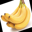

In [8]:
img=Image.open("/home/student/Desktop/PYTHON/G18/project/archive/fresh_banana/rotated_by_15_Screen Shot 2018-06-12 at 9.38.22 PM.png")
img.resize((32,32))

In [9]:
data=tf.keras.utils.image_dataset_from_directory("/home/student/Desktop/PYTHON/G18/project/archive",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=14682)

Found 14682 files belonging to 12 classes.


In [10]:
for feature,label in data:
    print(feature.shape,label.shape)
    break

2022-12-21 21:40:12.116621: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 951 of 117456
2022-12-21 21:40:22.043643: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1802 of 117456
2022-12-21 21:40:32.031633: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2445 of 117456
2022-12-21 21:40:42.010041: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 3103 of 117456
2022-12-21 21:40:52.020430: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 3733 of 117456
2022-12-21 21:41:02.058464: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 4200 of 117456
2022-12-21 21:41:12.006805: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Fil

(14682, 32, 32, 3) (14682,)


In [12]:
model=tf.keras.Sequential([
    layers.Conv2D(16,3,input_shape=(32,32,3),activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Conv2D(48,3,activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(16,"relu"),
    layers.Dense(12,"softmax")
])

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 48)          13872     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 48)        

In [14]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [15]:
for images,labels in data:
    features=tf.divide(feature,255)
    labels=tf.one_hot(label,12)
    record=model.fit(features,labels,batch_size=50,epochs=10)
    break

2022-12-21 21:46:13.993399: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 925 of 117456
2022-12-21 21:46:24.013129: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1799 of 117456
2022-12-21 21:46:33.984809: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2633 of 117456
2022-12-21 21:46:43.981421: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 3624 of 117456
2022-12-21 21:46:53.981229: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 4585 of 117456
2022-12-21 21:47:03.974720: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 5558 of 117456
2022-12-21 21:47:13.981793: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Fil

Epoch 1/10
  1/294 [..............................] - ETA: 26:10 - loss: 2.4278 - accuracy: 0.1800

2022-12-21 21:48:50.289806: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 22291776 exceeds 10% of free system memory.


294/294 [==============================] - 24s 63ms/step - loss: 1.4350 - accuracy: 0.4926
Epoch 2/10
294/294 [==============================] - 18s 60ms/step - loss: 0.5922 - accuracy: 0.7895
Epoch 3/10
294/294 [==============================] - 17s 59ms/step - loss: 0.4459 - accuracy: 0.8403
Epoch 4/10
294/294 [==============================] - 18s 60ms/step - loss: 0.3682 - accuracy: 0.8673
Epoch 5/10
294/294 [==============================] - 18s 61ms/step - loss: 0.3239 - accuracy: 0.8852
Epoch 6/10
294/294 [==============================] - 19s 63ms/step - loss: 0.2864 - accuracy: 0.8987
Epoch 7/10
294/294 [==============================] - 17s 59ms/step - loss: 0.2649 - accuracy: 0.9100
Epoch 8/10
294/294 [==============================] - 17s 59ms/step - loss: 0.2298 - accuracy: 0.9220
Epoch 9/10
294/294 [==============================] - 17s 59ms/step - loss: 0.2196 - accuracy: 0.9262
Epoch 10/10
294/294 [==============================] - 17s 59ms/step - loss: 0.2055 - accurac

In [16]:
model=model.save("stale vs fresh.h5",save_format="h5")

In [17]:
model=tf.keras.models.load_model("stale vs fresh.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 48)          13872     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 48)        